<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/time_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## The STFT_calculator is included in the EEG_Lab.py source file

In [0]:
t_par = 3000
number_of_waves = 3
f_list = [np.random.randint(30, size=(3)) for i in range(number_of_waves)]
amp = [np.random.random(3)+1 for i in range(len(f_list))]
t = np.linspace(0,6,number_of_waves*t_par)
all_data = []
for i in range(number_of_waves):
  w = 2*np.pi*np.array(f_list[i])
  x = 0
  for j in range(3):
    x += amp[i][j]*(np.sin(w[j]*t[i*t_par:(i+1)*t_par]))

  all_data += x.tolist() 

all_data = np.array(all_data)

In [0]:
all_data = np.expand_dims(all_data, axis=1)

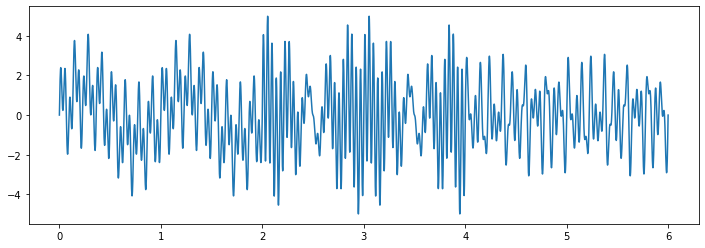

In [233]:
plt.figure(figsize=(12,4))
plt.plot(t, all_data[:,0])

In [0]:
def STFT_calculator(all_data, window_size=1500, fs=1500, total_t=6, f_cut=30, show=False, filter=False, channel=0):

  FFT = []
  f = np.linspace(1/total_t, fs, window_size)
  t = np.linspace(0, total_t,int(total_t*fs))

  for shift in range(1, t.shape[0] - window_size):
    data = all_data[shift:shift+window_size, :]
    fft = np.fft.fft(data.T)
    fft = fft.T
    fft = fft [f<f_cut,:]
    FFT.append(fft.tolist())

  FFT = np.array(FFT)
  print(FFT.shape)

  STFT = np.abs(FFT[:,::-1, :])

  if filter == True:
    mean = 500
    STFT_ = STFT.copy()
    for i in range(mean,np.shape(STFT)[1]-mean):
      STFT_[:,i] = np.min([STFT[:,i-j] for j in range(-mean,mean+1)], axis=0)
     
    STFT = STFT_

  if show == True:
    plt.imshow(STFT[:,:,channel].T, extent=[0, total_t, 1/total_t, f_cut], aspect='auto')


  return STFT

In [373]:
all_data.shape

(9000, 1)

ERROR! Session/line number was not unique in database. History logging moved to new session 74


ERROR! Session/line number was not unique in database. History logging moved to new session 76
(7499, 30, 1)


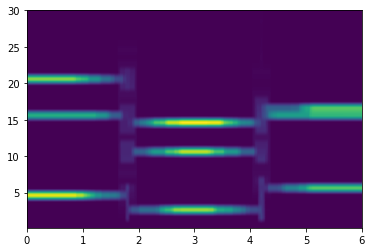

In [393]:
STFT = STFT_calculator(all_data, show=True, filter=True)

# STFT of EEG data

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters

In [0]:
subj_1 = datafetch.fetch_subject(1)

In [0]:
data = subj_1['train_data_class1']

(4799, 100, 63)


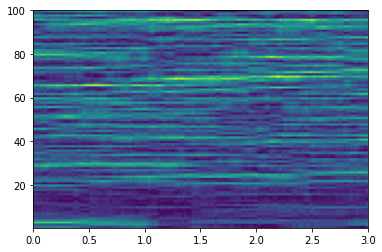

In [443]:
STFT = STFT_calculator(data[12], show=True, filter=True, window_size=2400, fs=2400, total_t=3, f_cut=100, channel=18)

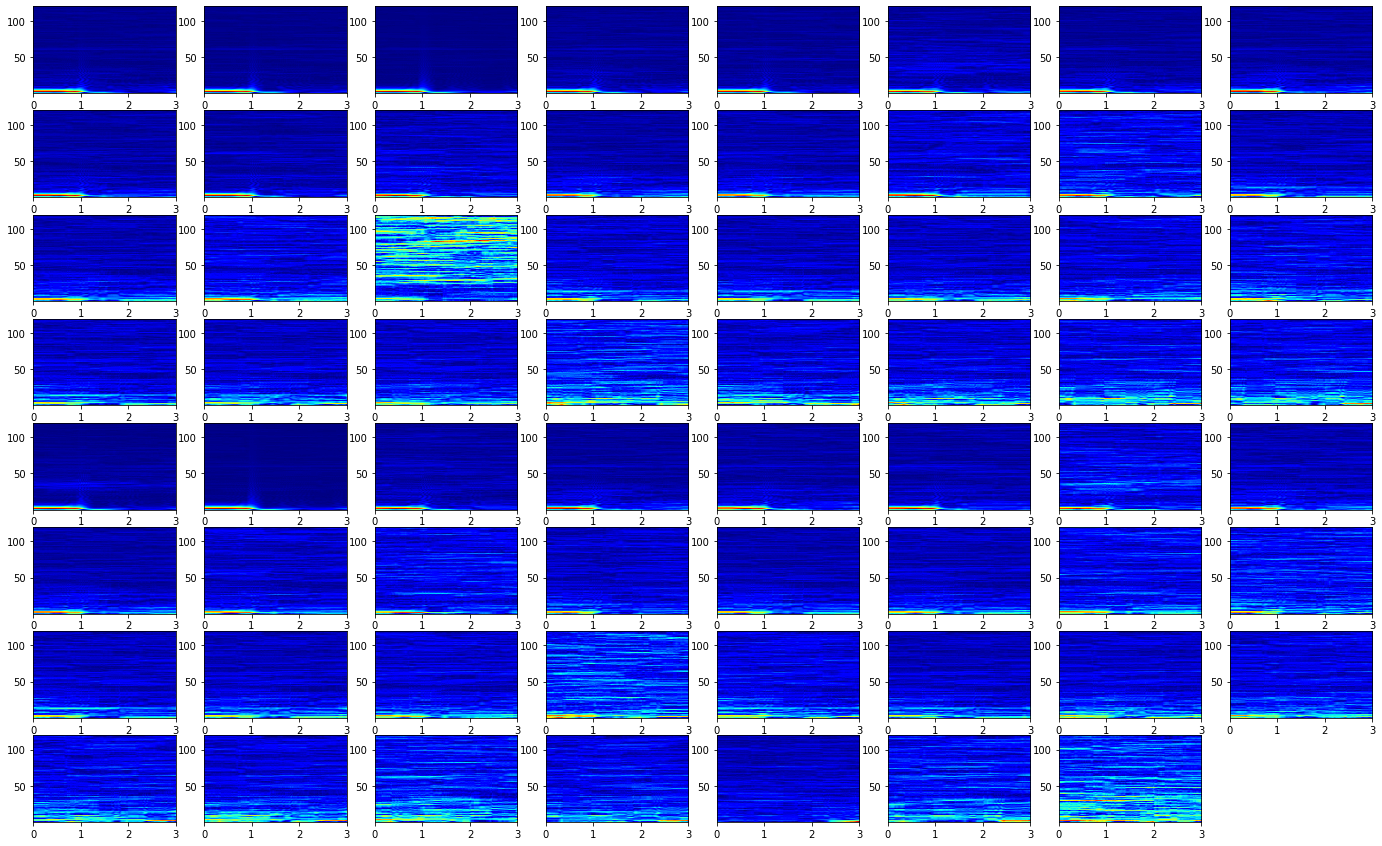

In [444]:
fig = plt.figure(figsize=(24,15))

for i in range(63):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(STFT[:,:,i].T, extent=[0, 3, 1/6, 120], aspect='auto', cmap='jet')

In [0]:
fig.savefig('STFT.png')